In [1]:
# Exemplo de determinação da fórmula de Ackreman

In [2]:
import numpy as np
import sympy as sp
import control                   
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

In [3]:
#  Matrizes do Sistema
A = np.matrix('0 1 0;0 0 1;-1 -5 -6');
B = np.matrix('0;0;1');

# Autovalores Desejados
u1 = -2+1j*4;
u2 = -2-1j*4;
u3 = -10;


In [4]:
# Matriz de Controlabilidade
Mc = control.ctrb(A,B)

In [5]:
# teste de controlabilidade
np.linalg.matrix_rank(Mc)

3

In [6]:
# Equação característica desejada
eq_des = np.poly([u1, u2, u3]);
eq_des

array([  1.,  14.,  60., 200.])

In [7]:
# Substituição da matriz A no polinômio desejado phi(A)
phi_A = A**3+14*A**2+60*A+200*np.eye(3)      

In [8]:
# Fórmula de Ackreman
K = np.matrix('0 0 1')*linalg.inv(Mc)*phi_A      
K

matrix([[199.,  55.,   8.]])

In [9]:
# ou
K = control.acker(A,B,[u1, u2, u3])
K

array([[199.,  55.,   8.]])

In [10]:
# Verificação dos Autovalores
eq_car = np.poly(A-B*K)
np.roots(eq_car)    

array([-10.+0.j,  -2.+4.j,  -2.-4.j])

In [11]:
 # ou
autovalores, autovetores = linalg.eig(A-B*K);
autovalores

array([ -2.+4.j,  -2.-4.j, -10.+0.j])

In [12]:
from control import matlab

In [14]:
X.shape

(1000, 3)

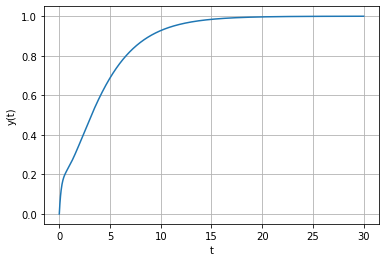

In [13]:
C = np.matrix('1 1 1');
D = 0;
sistema = control.ss(A,B,C,D);
#  Condições Iniciais
x0 = np.matrix('0;0;0');

# entrada nula - u
t = np.linspace(0, 30, 1000);
u = np.ones(len(t));


# resposta para entrada nula
Y, t, X = matlab.lsim(sistema,u,t,x0);


# comportamento da saída y                      
plt.figure()
plt.plot(t, Y)#, k*T, y,'*')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()